In [1]:
# Imported the relevant Python libraries

import numpy as np
import pandas as pd
from pathlib import Path
import os

In [2]:
# Read the 2019 (Train) and 2020 (Test) CSV files

train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

Creating the X and y co-ordinates for train and test dataframes

In [3]:
# X_2019 has been created for 2019 CSV files and dropped Unnamed and loan_status fields 
X_2019 = train_df.drop(['Unnamed: 0','loan_status'], axis=1)

# X_2020 has been created for 2020 CSV files and dropped Unnamed and loan_status fields 
X_2020 = test_df.drop(['Unnamed: 0','loan_status'], axis=1)

Creating a training set from the 2019 loans using pd.get_dummies() to convert the categorical data to numeric columns.

In [4]:
# Convert categorical data to numeric and separate target feature for training data
# LabelEncoder was imported from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

X_2019dummies = pd.get_dummies(X_2019)

# y_2019label created to save the target column of loan_status
y_2019label = LabelEncoder().fit_transform(train_df['loan_status'])
y_2019label

# Label encoder converted low_risk = 1 and high_risk = 0


array([1, 1, 1, ..., 0, 0, 0])

Creating a test set from the 2020 loans using pd.get_dummies() to convert the categorical data to numeric columns.

In [5]:
# Convert categorical data to numeric and separate target feature for testing data
X_2020dummies = pd.get_dummies(X_2020)

# y_2020label created to save the target column of loan_status
y_2020label = LabelEncoder().fit_transform(test_df['loan_status'])
y_2020label
# Label encoder converted low_risk = 1 and high_risk = 0

array([1, 1, 1, ..., 0, 0, 0])

In [6]:
# Displaying the Training data set
# Training data set consist of 93 columns  
X_2019dummies

,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,57107,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,...,0,1,0,1,1,0,1,0,1,0
1,141451,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,...,0,1,0,1,1,0,1,0,1,0
2,321143,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,...,0,1,0,1,1,0,1,0,1,0
3,11778,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,...,0,1,0,1,1,0,1,0,1,0
4,169382,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,354912,19975.0,0.2565,801.09,28000.0,28.42,0.0,0.0,15.0,0.0,...,0,1,0,1,1,0,1,0,1,0
12176,354944,15000.0,0.1774,540.34,50000.0,23.43,4.0,0.0,16.0,0.0,...,1,1,0,1,1,0,1,0,1,0
12177,354973,3600.0,0.1862,131.28,60000.0,28.80,0.0,1.0,14.0,0.0,...,0,1,0,1,1,0,1,0,1,0
12178,355002,15000.0,0.0881,475.68,62000.0,11.44,0.0,0.0,5.0,0.0,...,0,1,0,1,0,1,1,0,1,0


In [7]:
# Displaying the Test data set
# Training data set consist of 92 columns; Column "debt_settlement_flag_Y" is not present in the test dataset
X_2020dummies

,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,67991,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,...,0,0,1,0,1,1,0,1,0,1
1,25429,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,...,0,0,1,0,1,1,0,1,0,1
2,38496,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,...,0,0,1,0,1,1,0,1,0,1
3,19667,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,...,0,0,1,0,1,1,0,1,0,1
4,37505,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,...,0,0,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,77282,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,0.0,...,1,0,1,1,0,1,0,1,0,1
4698,77291,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,0.0,...,0,0,1,0,1,1,0,1,0,1
4699,77292,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,0.0,...,0,1,1,1,0,1,0,1,0,1
4700,77297,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,1.0,...,1,0,1,0,1,1,0,1,0,1


In [8]:
# add missing dummy variables to testing set
idx = 92

# The column "debt_settlement_flag_Y" was added in the Test dataset with value of 0
X_2020dummies.insert(loc=idx, column = 'debt_settlement_flag_Y', value = 0)
X_2020dummies

,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,67991,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,...,0,1,0,1,1,0,1,0,1,0
1,25429,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,...,0,1,0,1,1,0,1,0,1,0
2,38496,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,...,0,1,0,1,1,0,1,0,1,0
3,19667,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,...,0,1,0,1,1,0,1,0,1,0
4,37505,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,77282,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,0.0,...,0,1,1,0,1,0,1,0,1,0
4698,77291,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,0.0,...,0,1,0,1,1,0,1,0,1,0
4699,77292,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,0.0,...,1,1,1,0,1,0,1,0,1,0
4700,77297,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,1.0,...,0,1,0,1,1,0,1,0,1,0


Prediction Time:
Per me Logistic Regression model would perform better. Per the description of the assignment both the CSV have been undersampled. Logistic regression performs better when the number of noise variables is less than or equal to the number of explanatory variables.

In [9]:
# Creating Train and Test splits for the 2019 and 2020 dataset
from sklearn.model_selection import train_test_split

X_2019train, X_2019test, y_2019train, y_2019test = train_test_split(X_2019dummies, y_2019label, random_state=1)
X_2020train, X_2020test, y_2020train, y_2020test = train_test_split(X_2020dummies, y_2020label, random_state=1)

In [10]:
# Train the Logistic Regression model on the unscaled data and print the model score
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
#classifier
classifier.fit(X_2019train, y_2019train)

C:\Users\sunny\anaconda3\envs\PythonData2\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [11]:
print(f"Training Data Score: {classifier.score(X_2019train, y_2019train)}")
print(f"Testing Data Score: {classifier.score(X_2020test, y_2020test)}")

Training Data Score: 0.6553913519430761
Testing Data Score: 0.548469387755102


Logistic Regression Model scores without scaling the data are as follows:

Training Data Score: 0.6553913519430761
Testing Data Score: 0.548469387755102

In [12]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_2019train, y_2019train)
print(f'Training Score: {clf.score(X_2019train, y_2019train)}')
print(f'Testing Score: {clf.score(X_2020test, y_2020test)}')

Training Score: 1.0
Testing Score: 0.6930272108843537


Random Forest Classifier Model scores without scaling the data are as follows:

Training Score: 1.0
Testing Score: 0.6930272108843537

Without scaling the model scores indicate two things:
1. Testing score with Random Forest Classifier model is better for the Test dataset
2. We also observe that Training and Test score for Logistic Regression is closer to each other

However with these score the Random Forest Classifier model seems to be the right choice

In [13]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_2019train)
X_2019train_scaled = scaler.transform(X_2019train)
X_2020test_scaled = scaler.transform(X_2020test)

In [14]:
# Train the Logistic Regression model on the scaled data and print the model score
clf = LogisticRegression().fit(X_2019train_scaled, y_2019train)
print(f'Training Score: {clf.score(X_2019train_scaled, y_2019train)}')
print(f'Testing Score: {clf.score(X_2020test_scaled, y_2020test)}')


Training Score: 0.7065134099616859
Testing Score: 0.70578231292517


C:\Users\sunny\anaconda3\envs\PythonData2\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Model scores with scaling the data are as follows:

Training Score: 0.7065134099616859
Testing Score: 0.70578231292517

In [15]:
# Train a Random Forest Classifier model on the scaled data and print the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_2019train_scaled, y_2019train)
print(f'Training Score: {clf.score(X_2019train_scaled, y_2019train)}')
print(f'Testing Score: {clf.score(X_2020test_scaled, y_2020test)}')

Training Score: 1.0
Testing Score: 0.6904761904761905


Random Forest Classifier Model scores without scaling the data are as follows:

Training Score: 1.0
Testing Score: 0.6904761904761905

With scaling the model scores indicate two things:
1. Testing score with Random Forest Classifier model is similar to earlier values
2. The Logistic Regression values are better after scaling 

With scaling Logical Regression model seems to be the right choice

k: 1, Train/Test Score: 1.000/0.529
k: 3, Train/Test Score: 0.799/0.489
k: 5, Train/Test Score: 0.750/0.504
k: 7, Train/Test Score: 0.725/0.496
k: 9, Train/Test Score: 0.716/0.497
k: 11, Train/Test Score: 0.706/0.506
k: 13, Train/Test Score: 0.697/0.510
k: 15, Train/Test Score: 0.695/0.522
k: 17, Train/Test Score: 0.693/0.514
k: 19, Train/Test Score: 0.694/0.520


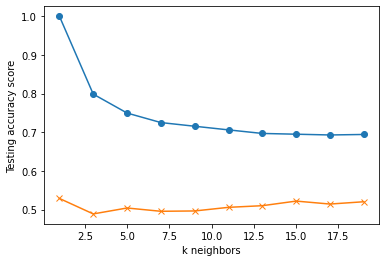

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_2019train_scaled, y_2019train)
    train_score = knn.score(X_2019train_scaled, y_2019train)
    test_score = knn.score(X_2020test_scaled, y_2020test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()